# Graphe : nombre de formes en fonction de l'âge

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

### Définitions des constantes

In [3]:
nbJoursAn=365
nbAnnees=8
million=1000000

### Nombre de milliers de tirages en fonction de l'âge

In [4]:
def nbFormesLexique(nbAnnees):
    return nbFormesJour*nbJoursAn*nbAnnees//1000

### Données Tirages et Nombres de formes

In [31]:
lexiqueTaillesBase=[23278,31402,36586,40411,43439,45894,47978,49753,51308,52615,60781,64536,66693,68046,68984,69683,70152,70560,70849,72445,73137,73551,73840,74070,74242,74395,74561,74702]
lexiqueTiragesBase=[200,400,600,800,1000,1200,1400,1600,1800,2000,4000,6000,8000,10000,12000,14000,16000,18000,20000,40000,60000,80000,100000,120000,140000,160000,180000,200000]
taillesSupplementaires=[76076, 77351, 78517, 79565, 80618, 81578, 82505]
tiragesSupplementaires=[200000*(i+2) for i in range(7)]
lexiqueTailles=lexiqueTaillesBase+taillesSupplementaires
lexiqueTirages=lexiqueTiragesBase+tiragesSupplementaires
#print len(lexiqueTailles)
#print len(lexiqueTirages)

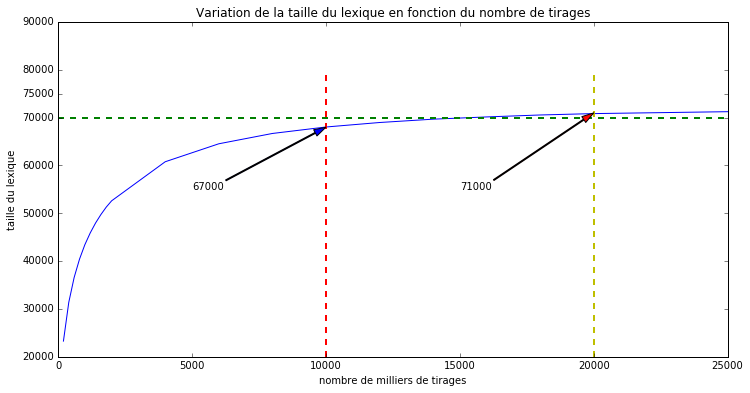

In [33]:
tiragesLexiques=pd.Series(lexiqueTailles,index=lexiqueTirages,name="milliers de tirages")
ax=tiragesLexiques.interpolate(method="cubic").plot(
    style=["b"],
    figsize=(12,6),
    title="Variation de la taille du lexique en fonction du nombre de tirages")
plt.plot([10000, 10000], [20000, 80000], 'r--', lw=2)
plt.plot([20000, 20000], [20000, 80000], 'y--', lw=2)
plt.plot([0, 200000], [70000, 70000], 'g--', lw=2)
plt.annotate('67000', xy=(10000, 68000), xytext=(5000, 55000),
            arrowprops=dict(facecolor='blue', width=1,headwidth=7),
            )
plt.annotate('71000', xy=(20000, 71000), xytext=(15000, 55000),
            arrowprops=dict(facecolor='red', width=1,headwidth=7),
            )
plt.xlim(0,25000)
ax.set(xlabel="nombre de milliers de tirages",ylabel="taille du lexique")
#plt.xticks(list(plt.xticks()[0])+[8.])
plt.yticks(list(plt.yticks()[0])+[75000.])
plt.show()

### Liste de nombres de tirages/jour
- liste des nombres de tirages/jour à tracer pour le graphe : nombre de formes=f(âge)

In [34]:
ageMax=2500.0
nbFormesJour=[1000*(i+1) for i in range(5)]
nbFormesJour

[1000, 2000, 3000, 4000, 5000]

Calcul de l'âge en fonction du nombre de tirages et du nombre de tirages/jour

In [35]:
def ageTirages(nbTirages,nombreFormes=2500):
    return float(nbTirages*1000)/(nombreFormes*nbJoursAn)

Calcul de la correspondance : (âge, nombre de formes) pour un certain nombre de tirages/jour

In [36]:
def agesLexiques(nombreFormes):
    ages=[]
    nbLexiques=[]
    nbTirages=[]
    for num,nbTirage in enumerate(lexiqueTirages):
        age=ageTirages(nbTirage,nombreFormes)
        if age<ageMax:
            ages.append(ageTirages(nbTirage,nombreFormes))
            nbLexiques.append(lexiqueTailles[num])
            nbTirages.append(nbTirage*1000)
    result=pd.Series(nbLexiques,index=[(divmod(a,.01)[0])/100 for a in ages],name="%d formes/jour"%nombreFormes)
    return result

- Accumulation des DataFrame (âge, nombre de formes) dans la liste graphes
- création du DataFrame ageLexiques à partir de graphes

In [37]:
graphes=[]
for nb in nbFormesJour:
    graphes.append(agesLexiques(nb))
ageLexiques=pd.concat(graphes, axis=1)

- interpolation des correspondances (âge, nombre de formes)
- création des n graphes correspondant (style => couleurs, figsize => taille)
- ajout des barres à x=8, y=75000
- ajout des flêches
- définition des limites du dessin sur x
- affichage du dessin

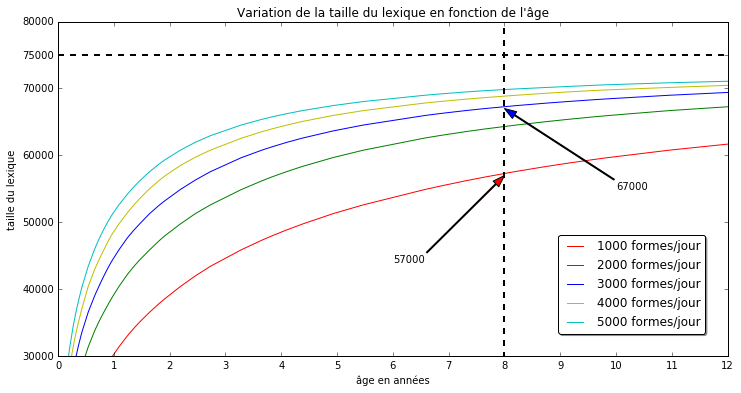

In [80]:
dfAgeLexiques=ageLexiques.interpolate(method="cubic")
ax=dfAgeLexiques.plot(
    style=["r","g","b","y","c"],
    figsize=(12,6),
    title=u"Variation de la taille du lexique en fonction de l'âge")
plt.plot([8, 8], [20000, 80000], 'k--', lw=2)
plt.plot([0, 12], [75000, 75000], 'k--', lw=2)
plt.annotate('67000', xy=(8, 67000), xytext=(10, 55000),
            arrowprops=dict(facecolor='blue', width=1,headwidth=8),
            )
plt.annotate('57000', xy=(8, 57000), xytext=(6, 44000),
            arrowprops=dict(facecolor='red', width=1,headwidth=8),
            )
plt.xticks(range(200))
plt.xlim(0,12)
plt.ylim(30000,80000)
ax.set(xlabel=u"âge en années",ylabel="taille du lexique")
ax.legend(loc='lower right', bbox_to_anchor=(0.975, 0.05),ncol=1, fancybox=True, shadow=True)
plt.yticks(list(plt.yticks()[0])+[75000.])
plt.show()

In [83]:
dfAgeLexiques[dfAgeLexiques.index<8]

,1000 formes/jour,2000 formes/jour,3000 formes/jour,4000 formes/jour,5000 formes/jour
0.10,NaN,NaN,NaN,NaN,23278.000000
0.13,NaN,NaN,NaN,23278.000000,25899.852723
0.18,NaN,NaN,23278.000000,26697.356459,29560.855180
0.21,NaN,NaN,24897.392695,28445.004348,31402.000000
0.27,NaN,23278.000000,27797.784634,31402.000000,34474.710560
0.32,NaN,25133.390869,29901.681926,33458.699622,36586.000000
0.36,NaN,26487.883808,31402.000000,34915.991627,38088.358836
0.41,NaN,28033.274167,33074.831811,36586.000000,39783.141957
0.43,NaN,28609.027561,33687.369274,37225.746706,40411.000000
0.54,23278.000000,31402.000000,36586.000000,40411.000000,43439.000000
